# EDA ANALYSIS ON LOAN DATASET

In [423]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [424]:
#importing data set 
loan=pd.read_csv("loan.csv",low_memory=False)
#checking the rows & columns 
loan.shape

(39717, 111)

In [359]:
#getting sample data
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [425]:
#Checking information of all the columns like data types
loan.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [427]:
# Check the summary for the numeric columns
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## 2. DATA CLEANING

In [428]:
# Checking for Duplicate rows in the dataset.
print(loan.duplicated(subset=None,keep='first').count())

# The column used for checking is id column
duplicate_rows=loan[loan.duplicated(['id'])]
print("duplicate_rows :", duplicate_rows)

# Output-There are no duplicate rows in the dataset

39717
duplicate_rows : Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, ma

In [429]:
#Find the number of rows through sum function having missing values
print('number of rows with missing values')
print(loan.isnull().all(axis=1).sum())
#there are no rows with missing values as the output for the above exceution is 0.

# Finding the number of columns through sum function which have missing values

print('Number of columns having all values as null:')
print(loan.isnull().all(axis=0).sum())

# Output-
# There are 54 empty columns or columns having all the values as null in the entire dataset

number of rows with missing values
0
Number of columns having all values as null:
54


In [430]:
#describing columns having missing values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [431]:
#removing columns with null /missing values
#removing columns from index 53 to 108 as they only have missing values 
loan.drop(loan.iloc[:,53:105],inplace=True,axis=1)

In [432]:
# Now, as a next step dropping other columns which are not required in the analysis 
# as they contain most of the values as nulls

col_drop_l1=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan.drop(labels=col_drop_l1,axis=1,inplace=True)

col_drop_l2=["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan.drop(labels=col_drop_l2,axis=1,inplace=True)

col_drop_l3=["member_id","url","emp_title","zip_code","tax_liens"]
loan.drop(labels=col_drop_l3,axis=1,inplace=True)

In [28]:
#after cleaning of columns checking the set
print(loan.shape)
print(loan.info)

(39717, 45)
<bound method DataFrame.info of             id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501       5000         5000           4975.0   36 months   10.65%   
1      1077430       2500         2500           2500.0   60 months   15.27%   
2      1077175       2400         2400           2400.0   36 months   15.96%   
3      1076863      10000        10000          10000.0   36 months   13.49%   
4      1075358       3000         3000           3000.0   60 months   12.69%   
...        ...        ...          ...              ...         ...      ...   
39712    92187       2500         2500           1075.0   36 months    8.07%   
39713    90665       8500         8500            875.0   36 months   10.28%   
39714    90395       5000         5000           1325.0   36 months    8.07%   
39715    90376       5000         5000            650.0   36 months    7.43%   
39716    87023       7500         7500            800.0   36 months   13.75%

In [433]:
#moving forward checking the data types of the the data set
loan.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util  

In [434]:
# It shows there is extra space in column value
print (list(loan['term'])[0:5])
# Remove the space
loan['term'] = loan['term'].str.strip()
# Remove the months word from column value and change the datatype
loan['term'] = loan['term'].str.split().str[0].astype(int)
# Rename the column name
loan.rename(columns={'term': 'term_months'}, inplace=True)

[' 36 months', ' 60 months', ' 36 months', ' 36 months', ' 60 months']


In [310]:
# Data Cleaning and Manipulation

# Extracting digits from Employee's length column i.e. Employee's Tenure.This variable will add value in our analysis

# Firstly filling null values with 0
loan.emp_length.fillna('0',inplace=True)


# Print first 5 values from loan dataframe after this data manipulation
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65%,162.87,B,B2,10,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60,15.27%,59.83,C,C4,1,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36,15.96%,84.33,C,C5,10,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36,13.49%,339.31,C,C1,10,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60,12.69%,67.79,B,B5,1,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0


In [435]:
# bankruptcy is needed or not ?

In [436]:
#Data Manipulation and Cleaning step for removing % symbol from interest rate column to be used in analysis further
loan['int_rate']=loan['int_rate'].str.rstrip('%')

#Data Manipulation and Cleaning step for removing % symbol from revol_util column to be used in analysis further
loan['revol_util']=loan['revol_util'].str.rstrip('%')

In [437]:
columns1=['int_rate']
loan[columns1]=loan[columns1].apply(pd.to_numeric)

#droping off customer with 'current' status in loan_status as they wont be considered
loan = loan[loan.loan_status != "Current"]

In [42]:
#printing the latest set
print(loan.dtypes)

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util  

# Data Cleaning and Manipulation based on NaN values in Rows

In [438]:
#finding out percentage of loan_status w.r.t total number of loans issued
loan = loan_updated
(loan.loan_status.value_counts()*100)/len(loan)

#Finding out percentages of various purpose of loans out of total loans issued

(loan.purpose.value_counts()*100)/len(loan)

purpose
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: count, dtype: float64

In [373]:
#deleteing rows with more than 50% nan values 

p = 30.0
min_count =  int(((100-p)/100)*loan.shape[1] + 1)
print("rows containing either 50% or more than 50% NaN Values :", min_count)

#dropping those rows
loan_updated = loan.dropna( axis=0, thresh=min_count)
loan_updated

rows containing either 50% or more than 50% NaN Values : 33


,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,Dec,2011
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,Dec,2011
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,Dec,2011
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,Dec,2011
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0.0,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,A4,4,...,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,NaN,Jul,2007
39713,90665,8500,8500,875.0,36,10.28,275.38,C,C1,3,...,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,NaN,Jul,2007
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,A4,1,...,0.00,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,Jul,2007
39715,90376,5000,5000,650.0,36,7.43,155.38,A,A2,1,...,0.00,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,Jul,2007


In [439]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,Dec,2011
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,Dec,2011
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,Dec,2011
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,Dec,2011
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0.0,Dec,2011


# Outlier Removal

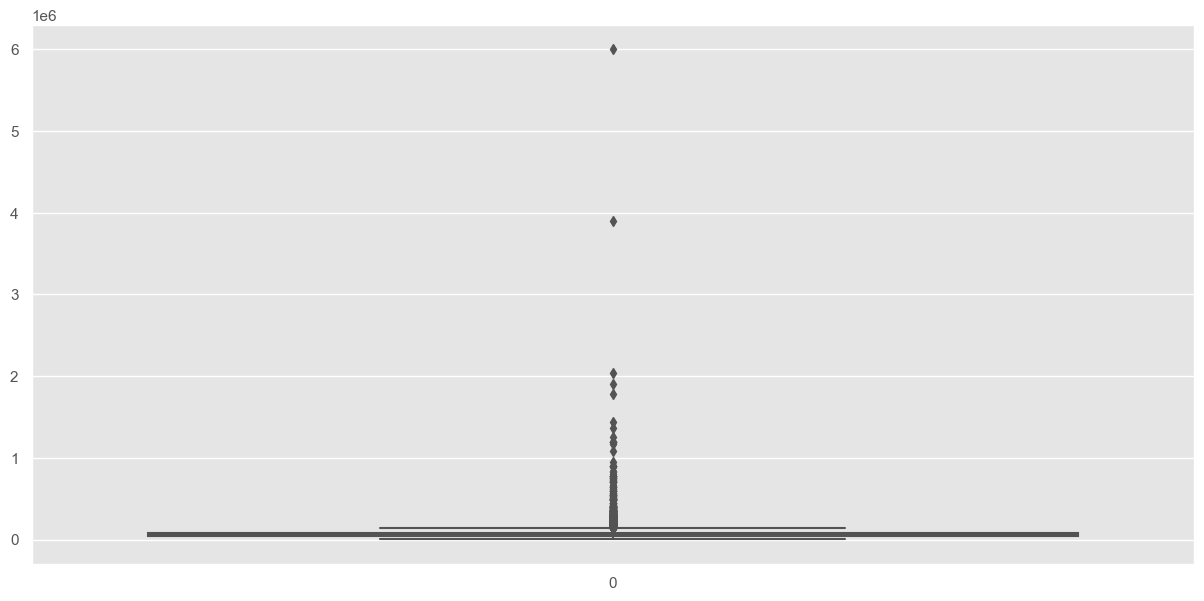

In [440]:
#Box Plot helps in identifying outliers
#plotting for annual income


plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan.annual_inc)

In [441]:
#lets focus on loan amount 
#getting quantative variables for loan_amount

loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [442]:
quant_info = loan["loan_amnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

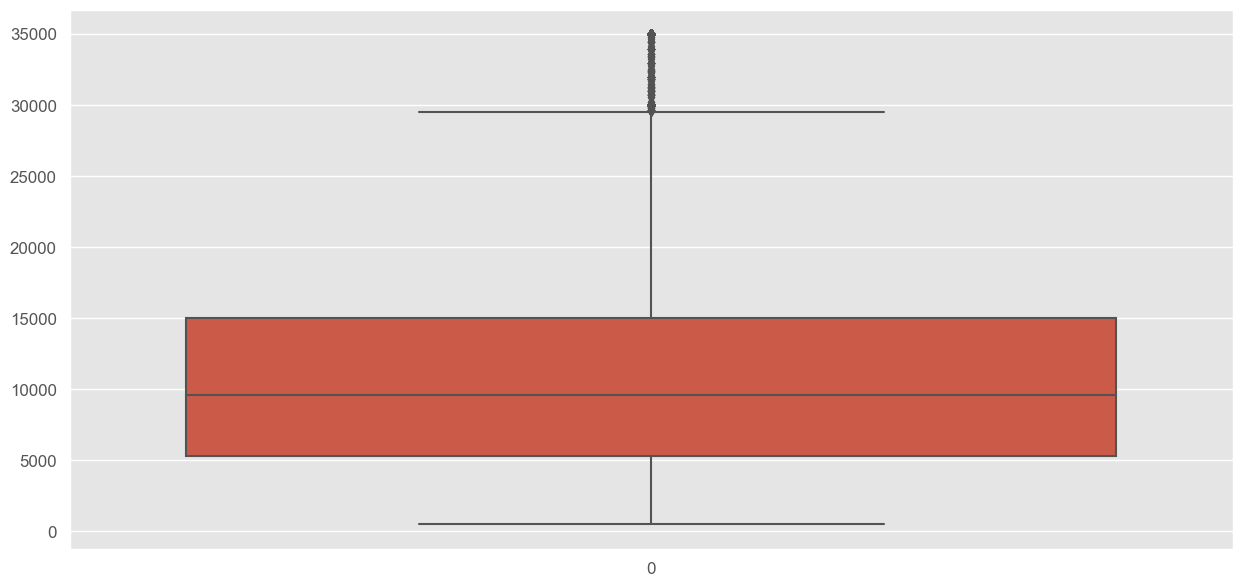

In [244]:
#drawing plot for loan amt
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan.loan_amnt)

####Observations
1.Some values are far from the distribution but overall its continous hence no need to remove outliers

In [443]:
#lets focus on total payment
loan["total_pymnt"].describe()

count    38577.000000
mean     11866.970365
std       8809.856227
min          0.000000
25%       5513.497338
50%       9674.048405
75%      16136.952430
max      58563.679930
Name: total_pymnt, dtype: float64

In [444]:
quant_info = loan["total_pymnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     9674.048405
0.75    16136.952430
0.90    24144.089150
0.95    29620.756460
0.97    32894.468009
0.98    36230.075738
0.99    41308.443919
Name: total_pymnt, dtype: float64

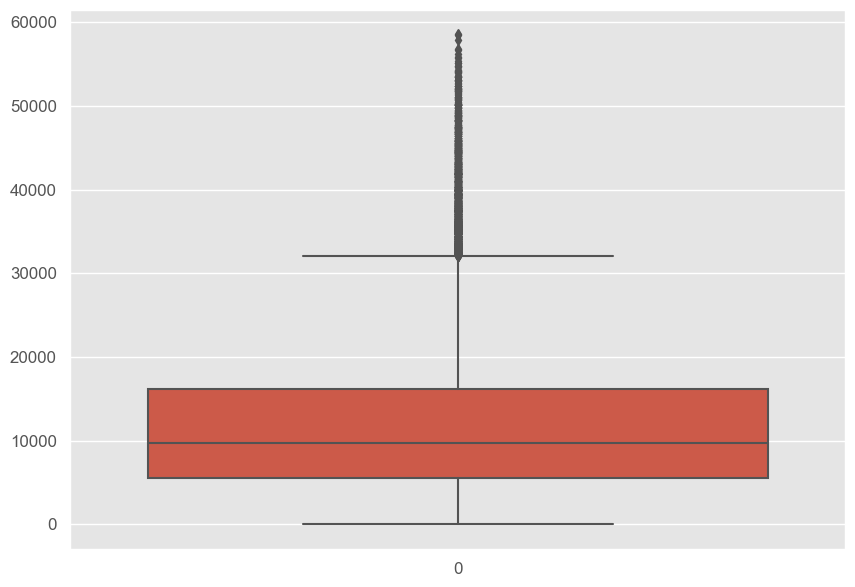

In [247]:
#drawing plot for loan amt
plt.figure(figsize=(10,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan.total_pymnt)

In [445]:
#It is same as loan_amt,some values are far from distributions but are mostly continous
#lets focus on interest rate now
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [446]:
quant_info = loan["int_rate"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50    11.710
0.75    14.380
0.90    16.820
0.95    18.312
0.97    19.290
0.98    19.910
0.99    20.990
Name: int_rate, dtype: float64

In [447]:
#Again not much difference in the values hence no need to remove any outliers
loan.shape

(38577, 47)

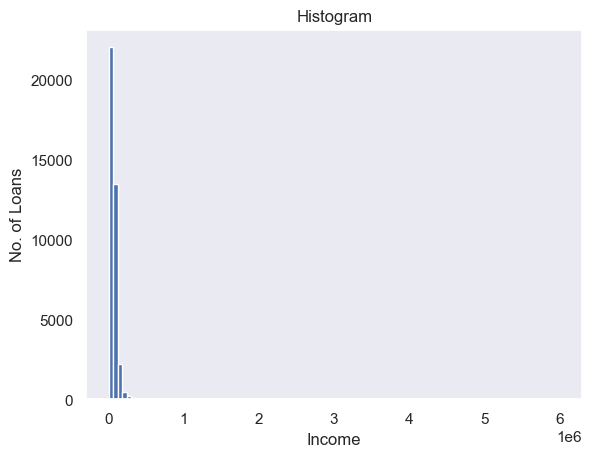

In [456]:
#loan distribution based on income
num_bins = 100

plt.hist(loan.annual_inc, num_bins)

plt.xlabel("Income")
plt.ylabel("No. of Loans")

plt.title("Histogram")

#plt.legend()

plt.show()

In [459]:
loan.annual_inc.describe()
loan.annual_inc.quantile(0.75)

82000.0

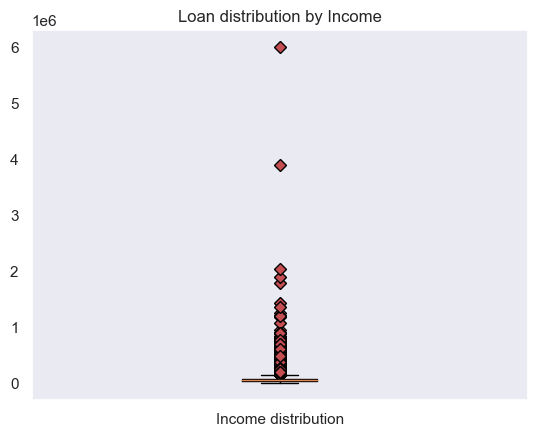

In [460]:
data1 = loan[['annual_inc']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Loan distribution by Income')

# make the boxplot
plt.boxplot(data1.values, labels=['Income distribution'], flierprops=red_diamond);

In [463]:
Income_LT_250000 = loan[(loan['annual_inc'] <= 250000)]

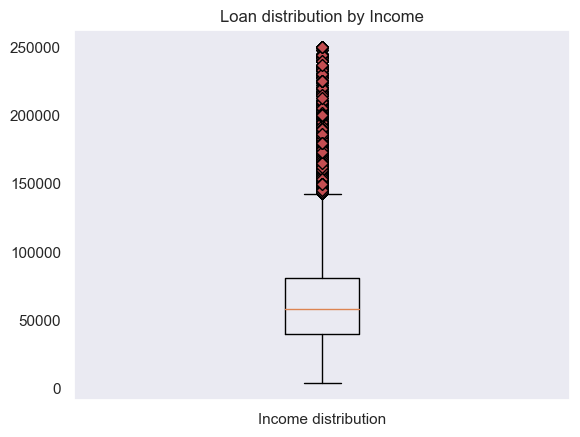

In [464]:
data2 = Income_LT_250000[['annual_inc']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Loan distribution by Income')

# make the boxplot
plt.boxplot(data2.values, labels=['Income distribution'], flierprops=red_diamond);

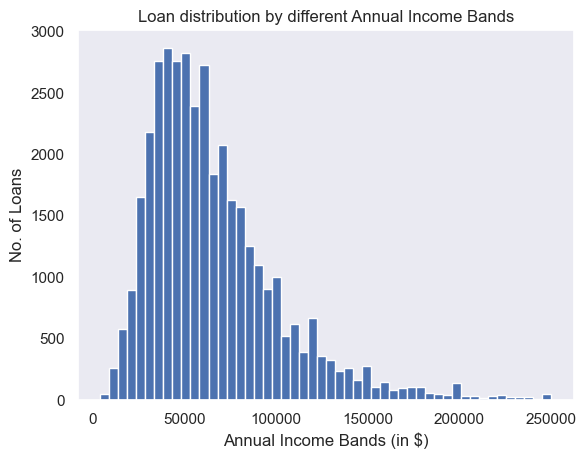

In [465]:
num_bins = 50

plt.hist(Income_LT_250000.annual_inc, num_bins)

plt.xlabel("Annual Income Bands (in $)")
plt.ylabel("No. of Loans")

plt.title("Loan distribution by different Annual Income Bands")

#plt.legend()

plt.show()

# DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [383]:
##### Distribution of Loan amounts

[Text(0.5, 1.0, 'Funded Amount Inv.-Distribution Plot'),
 Text(0.5, 0, 'Funded Amount Inv')]

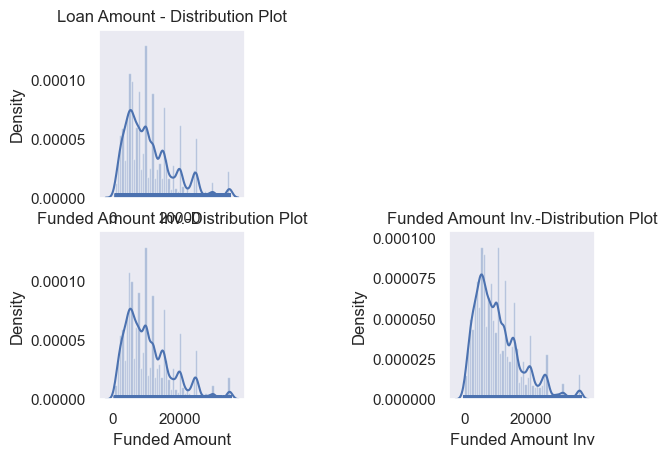

In [448]:
#plot based on loan amount
plt.subplot(2,3,1)
ax=sns.distplot(loan['loan_amnt'],rug=True)
ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


#plot based on Funded Amount
plt.subplot(2,3,4)
ax=sns.distplot(loan['funded_amnt'],rug=True)
ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount')


#plot based on Funded AmountInv
plt.subplot(2,3,6)
ax=sns.distplot(loan['funded_amnt_inv'],rug=True)
ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount Inv')

#### Not much difference across the distribution plots 

##### Univariate Analysis on loan amount

In [449]:
## Extracting month and year
df_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=df_month_year[0]                       
loan['issue_year']='20' + df_month_year[2]

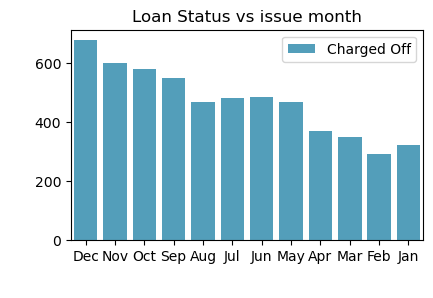

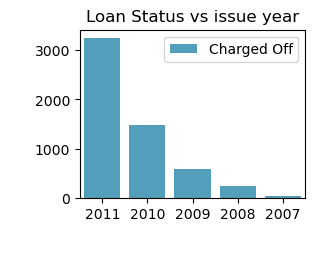

In [188]:
plt.figure(figsize=(10,6))

plt.subplot(221)
ax = sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue month')
ax.set_xlabel('issue month',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

plt.subplot(222)
ax = sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue year')
ax.set_xlabel('issue year',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Observations:

1) From above plots, it shows that more number of loans were issued in month of Nov,Dec, the reasons could be Festivals(Thanks giving Day, Christmas and New Year).

2) In 2011 Year, there was huge spike in charged off.

3) Number of loans issued increased steadily with slight descrease in 2008 year.

# Univariate Analysis on Unordered Categorical Variables

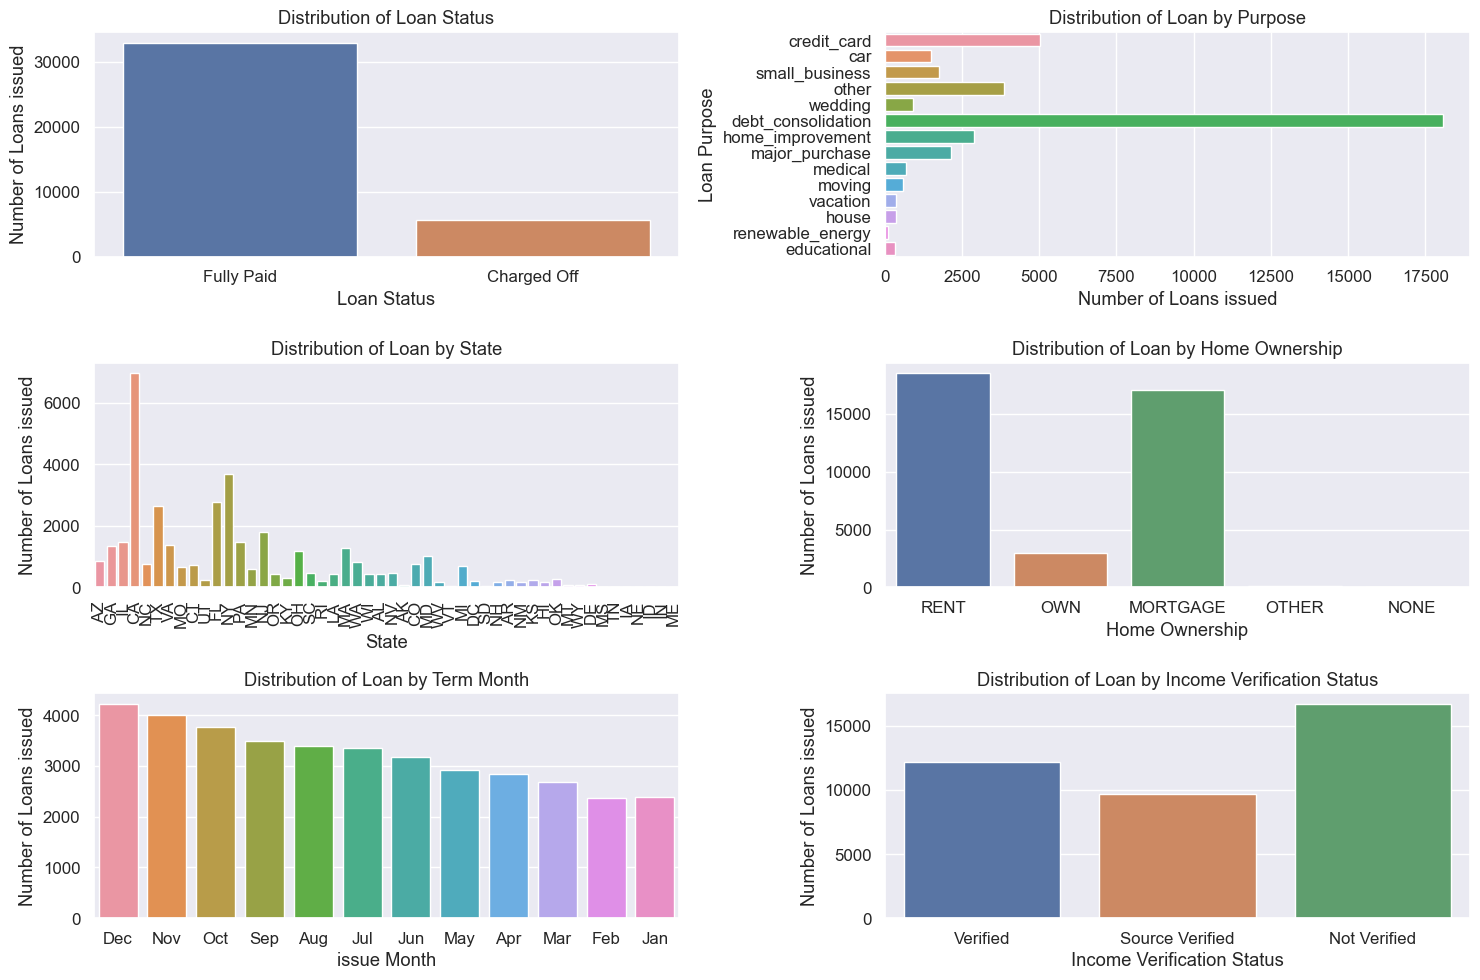

In [385]:
# Univariate Analysis on Unordered Categorical variables
plt.figure(figsize=(15,10))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(x='loan_status', data=loan)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Purpose
plt.subplot(3,2,2)
sns.countplot(y='purpose', data=loan)
plt.title('Distribution of Loan by Purpose')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")

# Distribution of Loan by State
plt.subplot(3,2,3)
sns.countplot(x='addr_state', data=loan)
plt.xticks(rotation=90)

plt.title('Distribution of Loan by State')
plt.xlabel("State")
plt.ylabel("Number of Loans issued")
# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan by Home Ownership
plt.subplot(3,2,4)
sns.countplot(x='home_ownership', data=loan)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")


# Distribution of Loan by Term Month
plt.subplot(3,2,5)
sns.countplot(x='issue_month', data=loan)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("issue Month")
plt.ylabel("Number of Loans issued")


# Distribution of Loan by Income Verification Status
plt.subplot(3,2,6)
sns.countplot(x='verification_status', data=loan)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

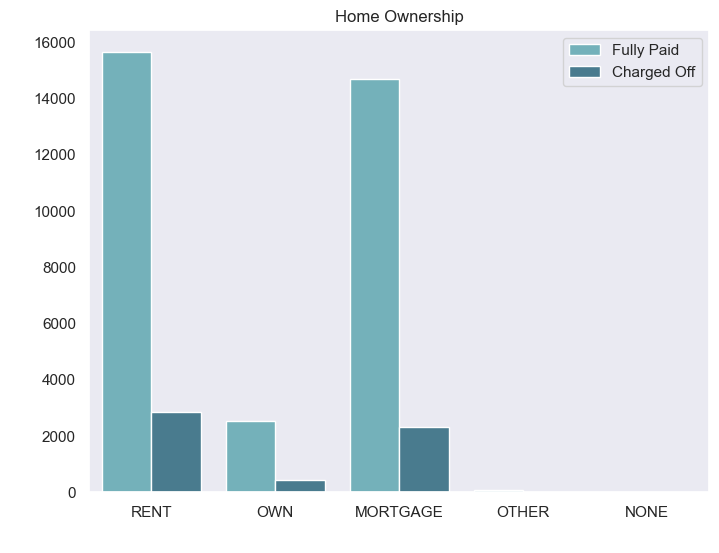

In [468]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')
plt.show()


Observation:

1) From this dataset, we have more observations(85%) from "Fully Paid" status.

2) There are more loan applicant's with purpose of debt consolidation.

3) There are more loan applicant's from California state.

4) Most of the loan applicant's are rented and mortgage.

5) No.of Loans increases by the end of year

6) Greater number of loans which have not verified the annual income.

7) Applicant numbers are high from these categories so charged off is high too.

Borrowers with own house and want to consolidate debt are not at much risk, but borrower with rent,mortgage and want to consolidate debt are at high risk applicants.

# Univariate Analysis on Ordered Categorical Variables

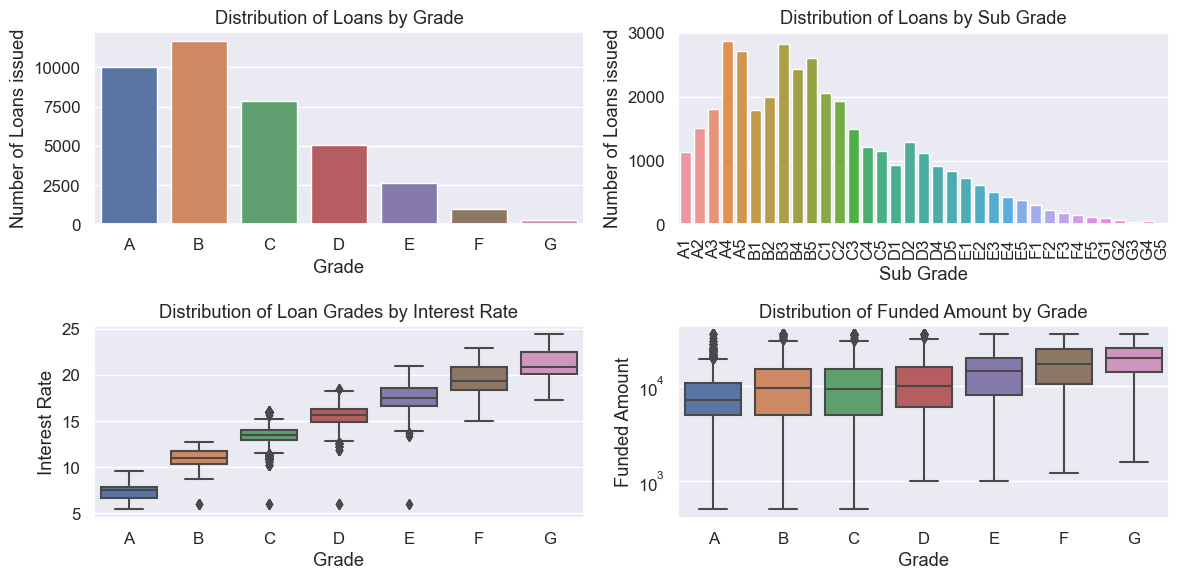

In [386]:
# Distribution of Loans by Grade and Sub-Grade
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,2,1)
sns.countplot( x="grade", data=loan,order = np.sort(loan['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(2,2,2)
sns.countplot( x="sub_grade", data=loan, order = np.sort(loan['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan Grades by Interest Rate
plt.subplot(2,2,3)
sns.boxplot(x="grade", y="int_rate", data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")

# Distribution of Funded Amount by Grade
plt.subplot(2,2,4)
sns.boxplot(x="grade", y="funded_amnt" , data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')

# To adjust spacing between subplots
plt.tight_layout()

plt.show()

Observations:

1) From above plots, it shows that more number of loans were from B,A and C grade's and least from G grade.

2) From Sub grades A4, B3 have more number of loans.

3) From 3rd plot, it shows that A,B,C grade loans have less interest rate and E,F,G have high interest rate. From 1st, 2nd plots there are more number of loans from A,B,C grade(granularity check from sub-grades). It might be the reason that the loan applicant's from A,B,C grades have better credit score and lower risk.

4) From 4th plot, it shows that there are high funded amount in A,B,C and D grades as the applicant's from these grades have better credit score and lower risk. 

#### Univariate analysis- Loan Paying Term

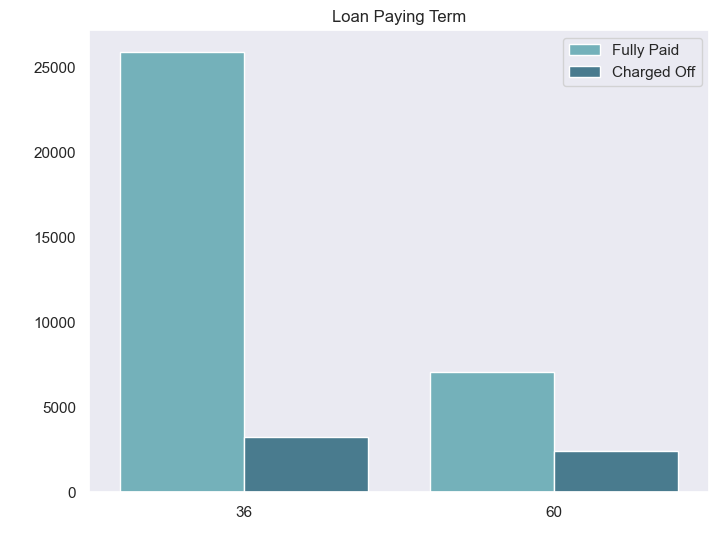

In [469]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="term_months",data=loan,hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Paying Term')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

###### Observations -
Above plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting
charged off as compared to applicants who had taken loan for 36 months. 

# Summary of Univariate Observations:

1) There are 40 variables (so far) with 39717 rows.

2) Number of loans issued increased steadily by every year with a slight decrease in 2008.

3) Of settled loans, 83% were Fully Paid and 14% were Charged Off.

4) Borrowers with own house and want to consolidate debt are not at much risk, but borrower with rent,mortgage and want to  consolidate debt are at high risk applicants.

5) Majority of loans were from A, B, and C grade.

6) There is an inverse relationship between interest rate and loan grade - lower grades have higher interest rate.

# Bivariate Analysis

In [388]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year'],
      dtype='object')

#### Corelation matrix

In [396]:

cor=loan.corr(numeric_only=True)
cor

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,emp_length,annual_inc,dti,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,pub_rec_bankruptcies
id,1.000000,0.120614,0.131283,0.231603,0.176405,0.053936,0.076088,0.089470,0.005572,0.091785,...,0.194832,0.092979,0.123268,-0.055789,0.038686,-0.010916,0.142251,NaN,NaN,-0.007997
loan_amnt,0.120614,1.000000,0.981790,0.937922,0.346650,0.301265,0.932260,0.156259,0.268999,0.062436,...,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,0.474614,NaN,NaN,-0.035981
funded_amnt,0.131283,0.981790,1.000000,0.956172,0.324893,0.304930,0.958035,0.155893,0.264798,0.062194,...,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,NaN,NaN,-0.036995
funded_amnt_inv,0.231603,0.937922,0.956172,1.000000,0.343922,0.297473,0.905464,0.164291,0.251981,0.070663,...,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,NaN,NaN,-0.041193
term_months,0.176405,0.346650,0.324893,0.343922,1.000000,0.440206,0.090456,0.102642,0.043866,0.076182,...,0.320900,0.200222,0.506258,0.012850,0.112806,0.037361,0.270192,NaN,NaN,0.014529
int_rate,0.053936,0.301265,0.304930,0.297473,0.440206,1.000000,0.277203,0.011440,0.048899,0.110913,...,0.284932,0.174717,0.521233,0.094319,0.128596,0.070013,0.174377,NaN,NaN,0.083027
installment,0.076088,0.932260,0.958035,0.905464,0.090456,0.277203,1.000000,0.131151,0.267842,0.052038,...,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,NaN,NaN,-0.033361
emp_length,0.089470,0.156259,0.155893,0.164291,0.102642,0.011440,0.131151,1.000000,0.121229,0.048964,...,0.148592,0.132312,0.121895,-0.013655,0.026520,0.007294,0.087809,NaN,NaN,0.047620
annual_inc,0.005572,0.268999,0.264798,0.251981,0.043866,0.048899,0.267842,0.121229,1.000000,-0.121530,...,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,NaN,NaN,-0.016224
dti,0.091785,0.062436,0.062194,0.070663,0.076182,0.110913,0.052038,0.048964,-0.121530,1.000000,...,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,0.008566,NaN,NaN,0.005966


From above correlation plot it show:

1) There are no highly negative correlation between columns.

2) There are some highly correlated columns at top and middle left block.

3) There is 0.45 correlation between term_months and interest rate(int_rate).

4) There is 0.47 correlation between revol_util and interest rate(int_rate).

5) There is no much correlation between Annual Income, DTI with other columns.

<Figure size 2000x1500 with 0 Axes>

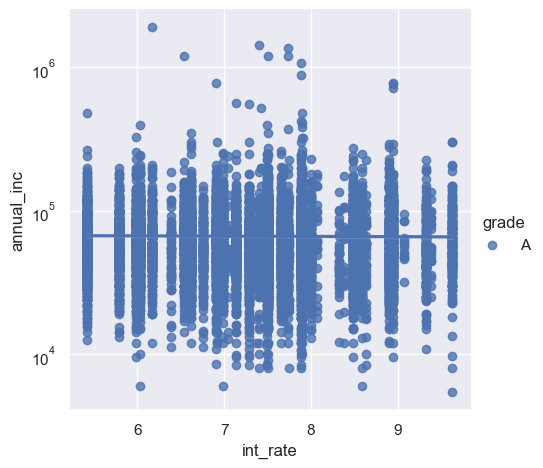

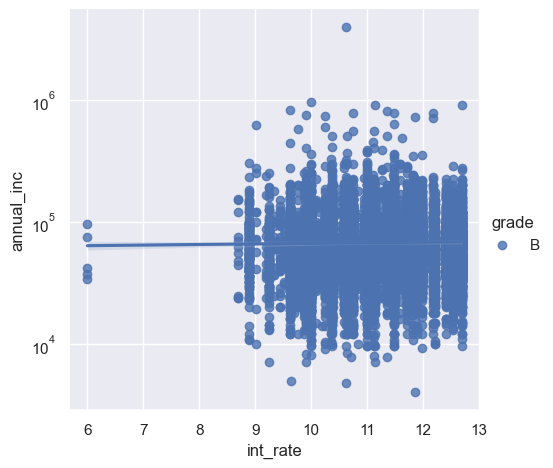

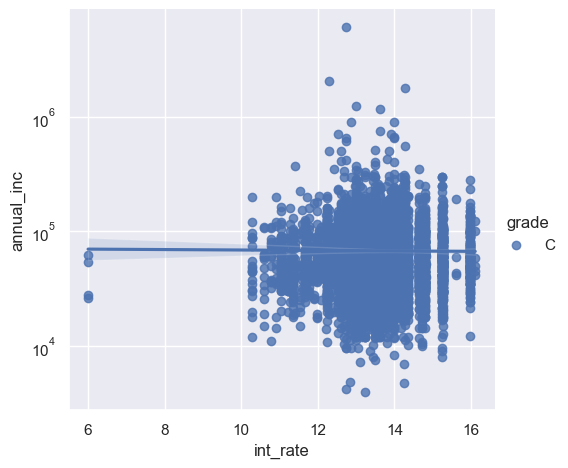

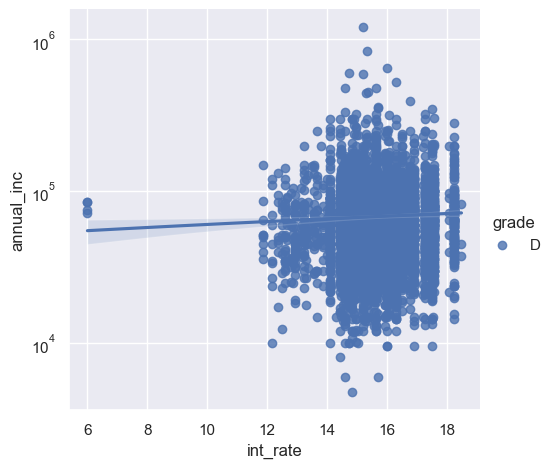

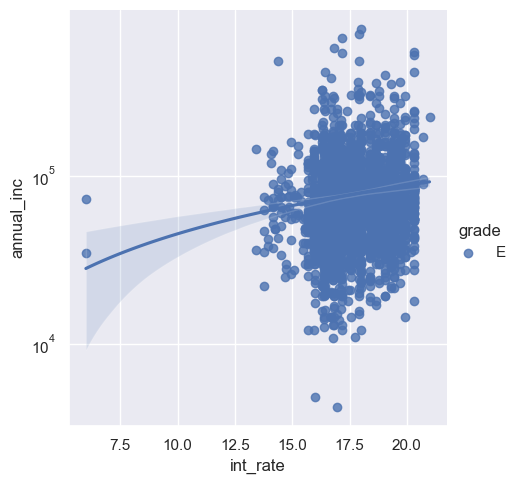

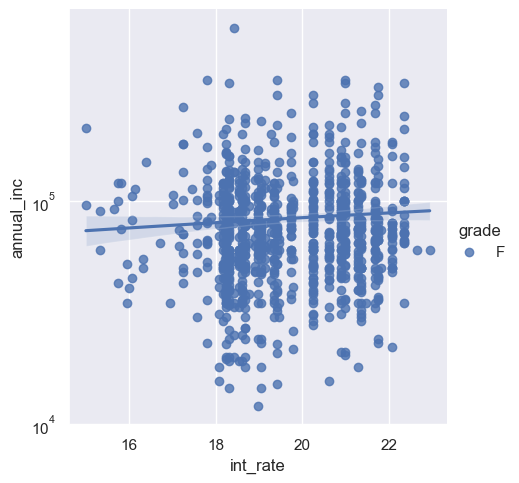

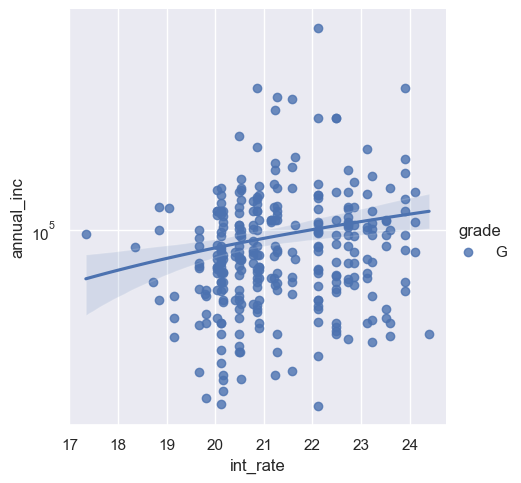

In [401]:
# Annual Income Vs Interest Rate distribution by each grade
plt.figure(figsize=(20,15))

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='A'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='B'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='C'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='D'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='E'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='F'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='G'], hue='grade')
plt.yscale('log')

plt.show()

Observations:

1) Grade A has borrowers with interest rate between 5-10%.

2) Grade B has borrowers with interest rate between 8-13%, but few are there with near 6%.

3) Grade C has borrowers with interest rate between 10-16%, but few are there with near 6%.

4) Grade D has borrowers with interest rate between 12-18%, but few are there with near 6%.

5) Grade E has borrowers with interest rate between 14-20%, but few are there with near 6%.

6) Grade F has borrowers with interest rate between 15-23%.

7) Grade G has borrowers with interest rate between 17-24%.

It is evident that the interest rate range changes from one grade to other, and also there are few borrowers with near 6% falling in B,C,D and E grade's.

# Bivariate Analysis on Categorical Variables

In [408]:

##### Bivariate Analysis for purpose of Loan Vs Charged Off Proportion

purpose_vs_loan = loan.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,ChargedOff_Proportion
11,small_business,475,1279,1754,0.270810
10,renewable_energy,19,83,102,0.186275
3,educational,56,269,325,0.172308
9,other,633,3232,3865,0.163777
5,house,59,308,367,0.160763
8,moving,92,484,576,0.159722
7,medical,106,575,681,0.155653
2,debt_consolidation,2767,15288,18055,0.153254
12,vacation,53,322,375,0.141333
4,home_improvement,347,2528,2875,0.120696


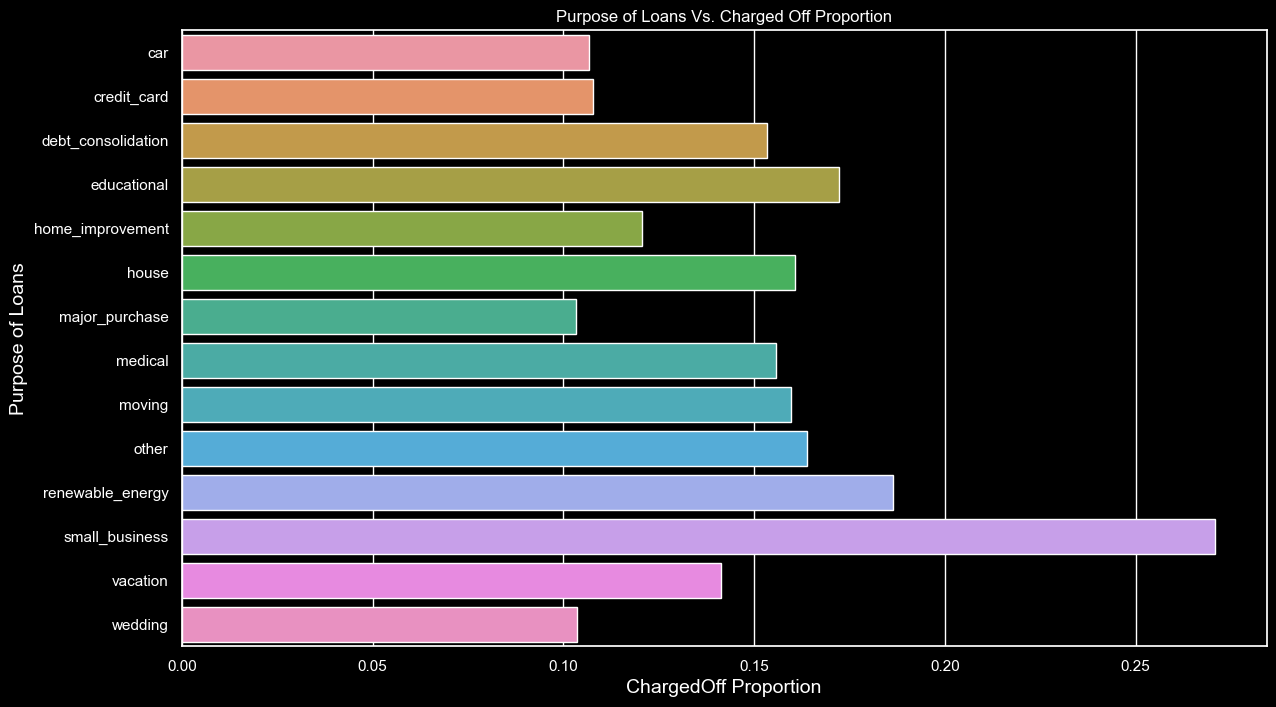

In [413]:
#Drawing Bar Charts from above data

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8))
  ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
  ax1=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
  ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
  ax1.set_xlabel('ChargedOff Proportion',fontsize=14,color='w')

# Loan Defaulters Analysis

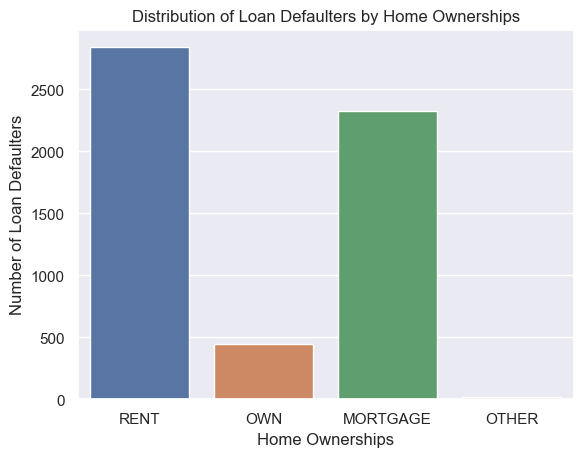

home_ownership
MORTGAGE    2327
OTHER         18
OWN          443
RENT        2839
Name: home_ownership, dtype: int64


In [414]:
# Distribution of Loan Defaulters by Home Ownerships
sns.countplot(x='home_ownership',  data=loan[loan['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count())

Observation: It shows there are more defaulters in RENT and MORTGAGE.

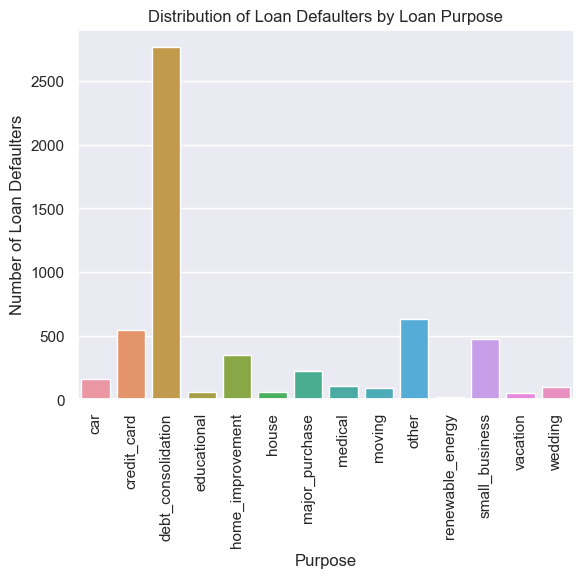

purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: purpose, dtype: int64


In [415]:
#Distribution of Loan Defaulters by Loan Purpose
sns.countplot(x='purpose',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan Defaulters")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()


print (loan[loan['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count())

Observation:

1) There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

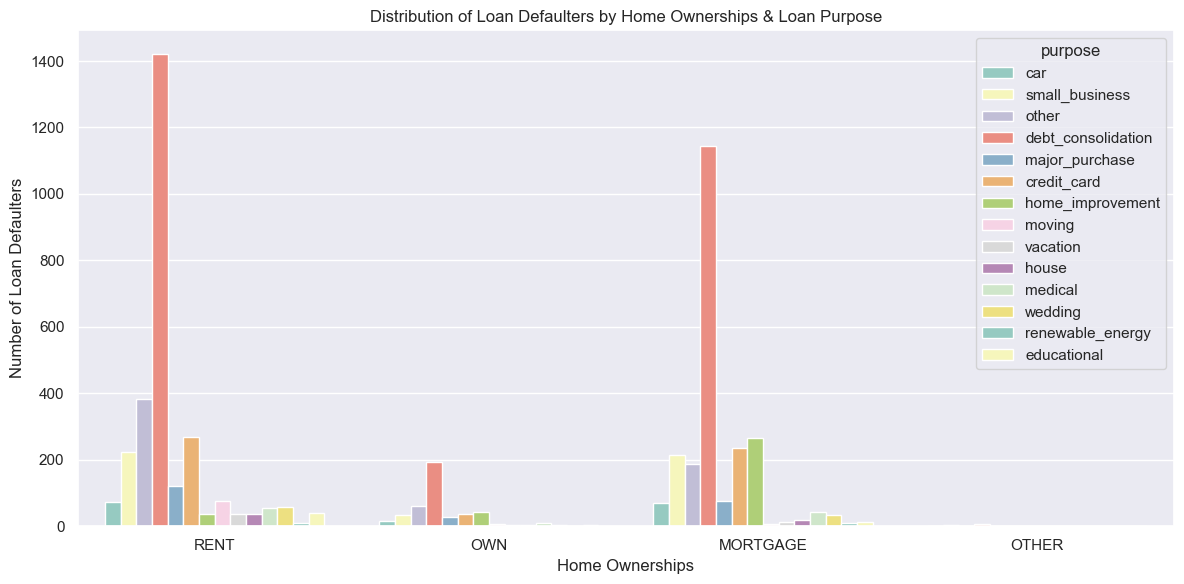

home_ownership  purpose           
MORTGAGE        car                     70
                credit_card            234
                debt_consolidation    1145
                educational             12
                home_improvement       266
                house                   19
                major_purchase          75
                medical                 42
                moving                   8
                other                  187
                renewable_energy         9
                small_business         214
                vacation                13
                wedding                 33
OTHER           car                      1
                credit_card              2
                debt_consolidation       7
                home_improvement         1
                moving                   1
                other                    2
                small_business           4
OWN             car                     15
                cre

In [416]:
# Distribution of Loan Defaulters by Home Ownerships & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership','purpose'])['home_ownership'].count())

Observation:

1) From RENT category, there are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

2) From MORTGAGE category, there are more defaulters from 'debt_consolidation','home_improvement', 'credit_card' and 'small_business'.

Overall, one should be carefull with 'debt_consolidation', 'credit_card' and 'small_business' loans when the borrowers dont have own house.

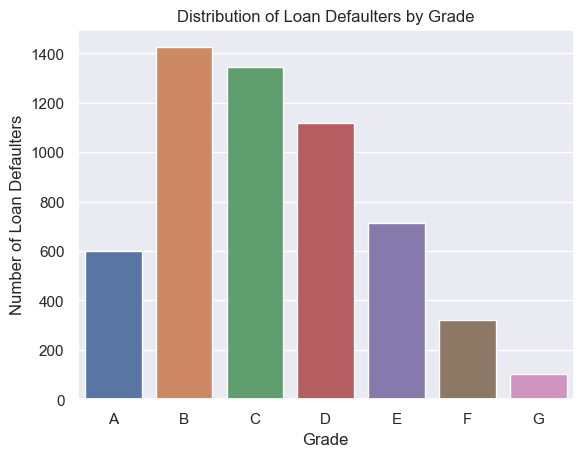

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
Name: grade, dtype: int64


In [417]:
#Distribution of Loan Defaulters by Grade
sns.countplot(x='grade',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['grade'])['grade'].count())

Observation:

1) It shows there are more defaulters in B,C and D grades.

2) Grades F,G(more interest rate grades) are having less defaulters which is a good indicator.



# Summary of Bivariate Observations:

### Bivariate Analysis on Continuous Variables:

#Correlation Plot:

a) There were no highly negative correlation between numerical columns.

b) 0.45 correlation between term_months and interest rate(int_rate).

c) 0.47 correlation between revol_util and interest rate(int_rate).

d) No much correlation between Annual Income, DTI with other numerical columns.


# Loan Defaulters Analysis:

1) Distribution of Loan Defaulters by Loan Purpose:
a) There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.
2) Distribution of Loan Defaulters by Home Ownerships:
a) By charts, it shows there are more defaulters in RENT and MORTGAGE.

3) Distribution of Loan Defaulters by Home Ownerships & Loan Purpose:
a) There are more defaulters with 'debt_consolidation', 'credit_card' and 'small_business' purpose from Rent, Mortgage category and hence, should be carefull when borrowers don't have own house.

4) Distribution of Loan Defaulters by Grade:
a) By charts, it shows there are more defaulters in B,C and D grades.
b) Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.



# Conclusion:

1) Number of loans issued increased steadily by every year with a slight decrease in 2008.

2) Of settled loans, 83% were Fully Paid and 14% were Charged Off.

3) Borrowers with own house and the purpose of loan with consolidate debt, 'credit_card' and 'small_business' are not at much risk, but borrower with rent,mortgage are high risk applicants.

4) Majority of loans were from A, B, and C grade.

5) There is an inverse relationship between interest rate and loan grade - lower grades(E,F,G) have higher interest rate.

6) Overall, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans from all grades.